# Simple Linear Regression
*   In this lab we will use simple linear regression to predict the car price.
*   Objective
    - To know if the dealer is offering fair value for my trade-in.
    - To know if I put a fair value on my car

In [34]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
df=pd.read_csv('automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [36]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [37]:
X= df.drop('price',axis=1) #independent variable
Y= df['price'] #dependent variable

In [38]:
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.2, random_state=1)

In [39]:
X_train_simple=X_train['highway-mpg'].values.reshape(-1,1)
X_test_simple=X_test['highway-mpg'].values.reshape(-1,1)

In [40]:
simple_lm=LinearRegression()
simple_lm.fit(X_train_simple,y_train)

LinearRegression()

In [41]:
y_hat_simple=simple_lm.predict(X_test_simple)
y_hat_simple[:5]

array([10530.19044542,  7150.17926639, 12220.19603494, 10530.19044542,
       13910.20162445])

In [42]:
simple_lm.intercept_

39260.285467176436

In [43]:
simple_lm.coef_.item()

-845.0027947574554

In [44]:
X_train_simple=X_train['horsepower'].values.reshape(-1,1)
X_test_simple=X_test['horsepower'].values.reshape(-1,1)

In [45]:
simple_lm=LinearRegression()
simple_lm.fit(X_train_simple,y_train)

LinearRegression()

In [46]:
y_hat_simple=simple_lm.predict(X_test_simple)
y_hat_simple[:5]

array([12166.10030237,  7173.74640389,  9928.14855478,  8550.94747933,
       15436.95285656])

In [47]:
simple_lm.intercept_

-4532.462737395461

In [48]:
simple_lm.coef_.item

<function ndarray.item>

In [49]:
# x_train,x_test , y_train, y_test = train_test_split(X,Y, random_state=1,test_size=0.3)


In [50]:
# x_test_simple=x_test['engine-size'].values.reshape(-1,1)
# x_train_simple=x_train['engine-size'].values.reshape(-1,1)

In [51]:
# x_train_simple.shape
# y_train.shape

In [52]:
# simple_lr=LinearRegression()
# simple_lr.fit(x_train_simple,y_train) 

# Multiple Linear Regression
-   As seen in Simple Linear Regression, we used single independent variable for car price prediction.
-   However, in real world datasets, for accurate prediction of car price, we need to consider multiple features/ variables instead of single one. In such scenario Multiple Linear Regression would be helpful.

__ Predict car price using variables [horsepower, curb-weight, engine-size, highway-mpg]

In [53]:
to_select = ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']

X_train_mult = X_train[to_select].values
X_test_mult= X_test[to_select].values

In [54]:
mult_lm=LinearRegression()
mult_lm.fit(X_train_mult,y_train)

LinearRegression()

In [63]:
y_hat_mult = mult_lm.predict(X_test_mult)


In [64]:
mult_lm.intercept_

-11539.108515802094

In [65]:
mult_lm.coef_

array([ 54.23019834,   3.1154028 ,  93.34038826, -18.71070774])

- Exercise

  - Fit Multiple linear Regression with [engine-size,horsepower] as independent variable to predict car price.
  - Fit Multiple linear Regression with [normalized losses,highway-mpg] as independent variable to predict car price.

# model Evaluation Using Visualization

- NOw we have we developed our simple linear regression and multiple linear regression model.
- How do we evaluated them?
- we can evaluate our Linear regression either visually or numerically.
- Lets first evaluate our linear Regression model visually using Regression Plot and Distribution Plot.

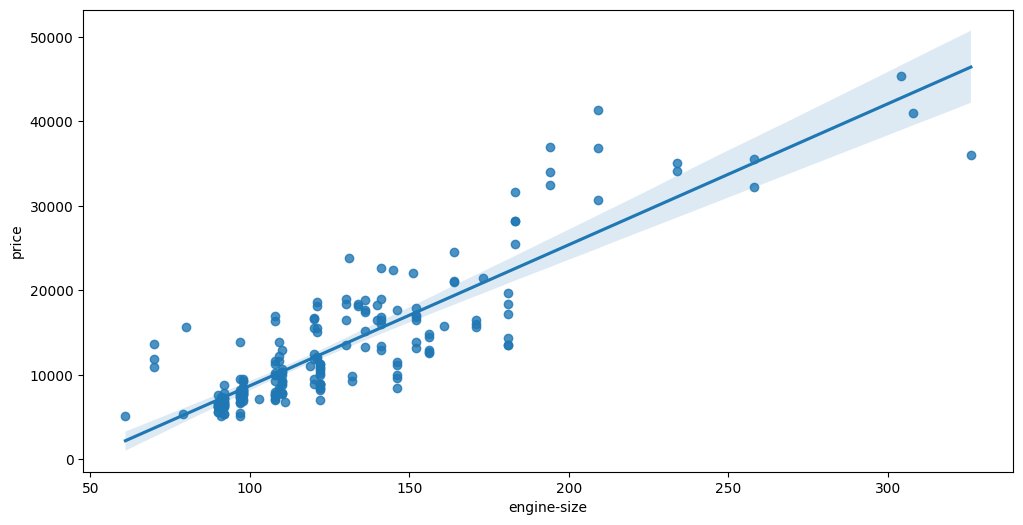

In [58]:
plt.figure(figsize=(12,6))
sns.regplot(x='engine-size',y='price',data=df)
plt.show()

- We see slop of the line is negative,which we predicted earlier when fitting simple linear regression line.
- More dispersed is the data point from the regression line,it will be not suitable to model such data point with linear regression.
- Hence,if the data is too far from the line this linear model might not be the bebst fit model for this data.
- In the above plot data is not perfectly liear so simple polynominal regression can so a better job,since it can capture non linear data.

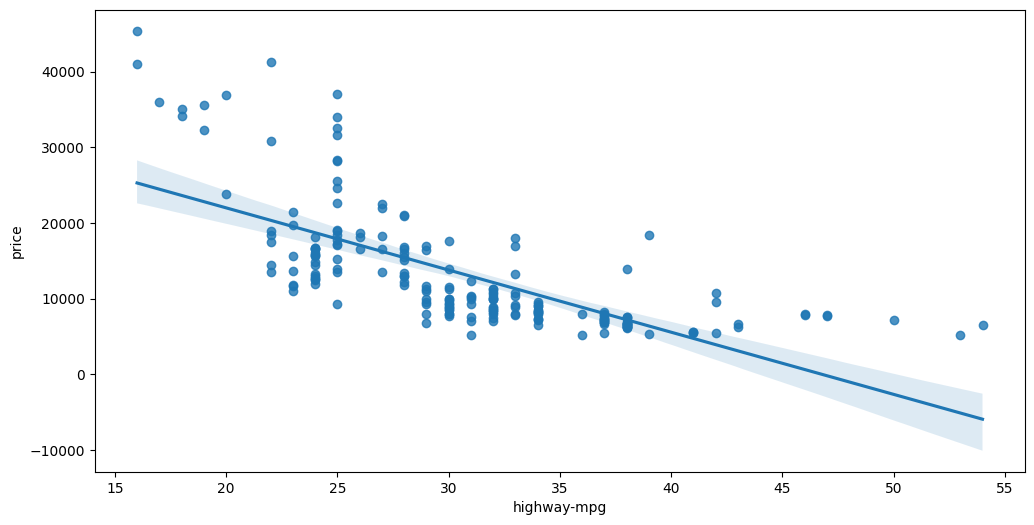

In [59]:
plt.figure(figsize=(12,6))
sns.regplot(x='highway-mpg',y='price',data=df)
plt.show()

# Distribution plot 

 - we successfully visualize simple linear regression model using Regression plot. it will be complicated for multiple linear regression since there will be multiple independent variable , in such scenarios we could using Distribttion plot.
 - Now lets visualize our prediction from linear regression model uaing Distribution plot.

/tmp/ipykernel_5101/3468724351.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='r', label="Actual value")
/tmp/ipykernel_5101/3468724351.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat_simple, hist=False, color="b", label="Fitted Va

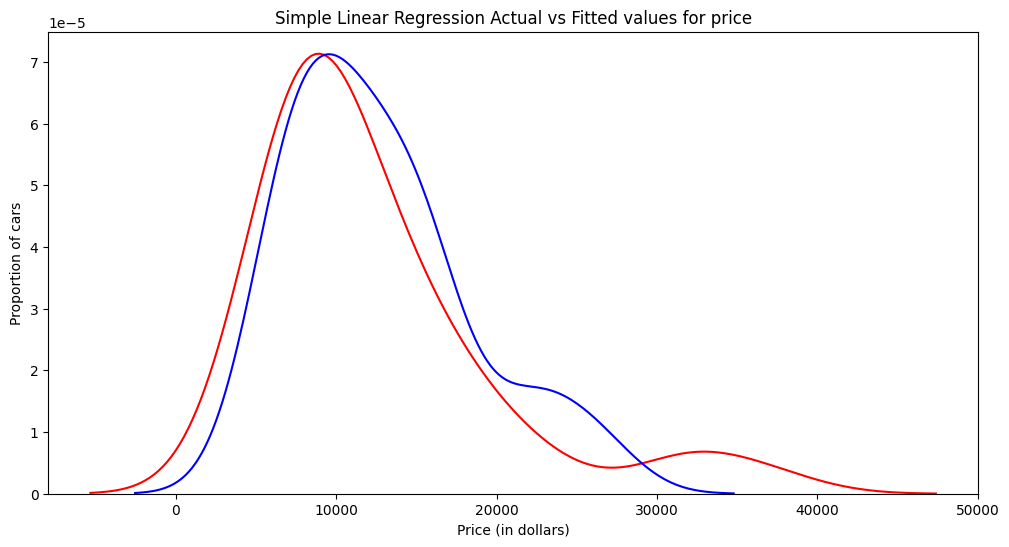

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
ax1 = sns.distplot(y_test, hist=False, color='r', label="Actual value")
sns.distplot(y_hat_simple, hist=False, color="b", label="Fitted Value", ax=ax1)

plt.title('Simple Linear Regression Actual vs Fitted values for price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of cars')

plt.show()
plt.close()


- From above 2 Distribution plot,we can say that,
  - modeling using multiple linear regression is far better that compared 

In [66]:
# Example data
X = np.array([
    [1, 50, 30],  # Example of multiple independent variables
    [1, 60, 35],
    [1, 70, 40],
    [1, 80, 45],
    [1, 90, 50]
])  # Added a constant term (1s) for the intercept

y = np.array([200, 240, 280, 320, 360])  # Dependent variable

# Calculate the coefficients
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

# Predict your values
y_pred = X @ coefficients

# Calculate SS_residual and SS_total
SS_residual = np.sum((y - y_pred) ** 2)
SS_total = np.sum((y - np.mean(y)) ** 2)

# Calculate R-squared
R_squared = 1 - (SS_residual / SS_total)

print("R-squared:", R_squared)

R-squared: -41.065226912498474


In [68]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
mse

134608.72611999512